In [3]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [4]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=17

In [5]:
g=9.8
vt=40
CD=1.0/50
CL=1.0
v0=vt
theta0=0.0
x0=0.0
y0=1000.0
#initial parameters

In [9]:
#phugoid function
def rhs_phugoid(u,CL,CD,g,vt):
    v,theta,x,y=u
    rhs=numpy.array([-g*math.sin(theta)-CD/CL*g/vt**2*v**2,-g*math.cos(theta)/v+g/vt**2*v,v*math.cos(theta),v*math.sin(theta)])
    return rhs


In [10]:
#euler method function
def euler_step(u,f,dt,*args):
    u_new=u+dt*f(u,*args)
    return u_new

In [15]:
T=100.0
dt=0.1
N=int(T/dt)
u=numpy.empty((N,4))
u[0]=numpy.array([v0,theta0,x0,y0])
for n in range(N-1):
    u[n+1]=euler_step(u[n],rhs_phugoid, dt, CL, CD, g, vt)

In [16]:
x=u[:,2]
y=u[:,3]

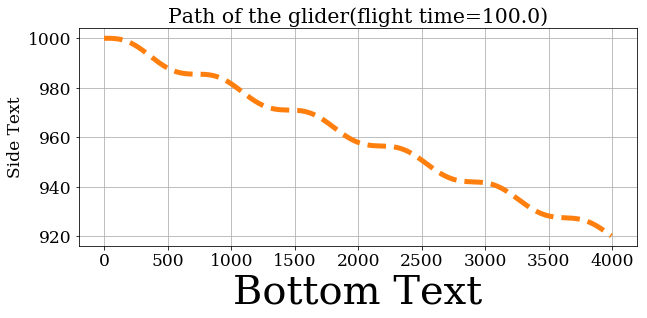

In [28]:
pyplot.figure(figsize=(10.0,4.0))
pyplot.title('Path of the glider(flight time={})'.format(T))
pyplot.xlabel('Bottom Text',fontsize=40)
pyplot.ylabel('Side Text')
pyplot.grid()
pyplot.plot(x,y,color='C1',linestyle='--',linewidth=5);

In [30]:
#calculate difference
dt_values=[0.1,0.05,0.01,0.005,0.001]
u_values=[]
for dt in dt_values:
    N=int(T/dt)
    u=numpy.empty((N,4))
    u[0]=numpy.array([v0,theta0,x0,y0])
    for n in range(N-1):
        u[n+1]=euler_step(u[n],rhs_phugoid,dt,CL,CD,g,vt)
        u_values.append(u)

In [35]:
def l1_diff(u_coarse,u_fine,dt):
    N_coarse=len(u_coarse)
    N_fine=len(u_fine)
    ratio=math.ceil(N_fine/N_coarse)
    diff=dt*numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

In [36]:
diff_values=[]
for i,dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:,2],u_values[-1][:,2],dt)
    diff_values.append(diff)

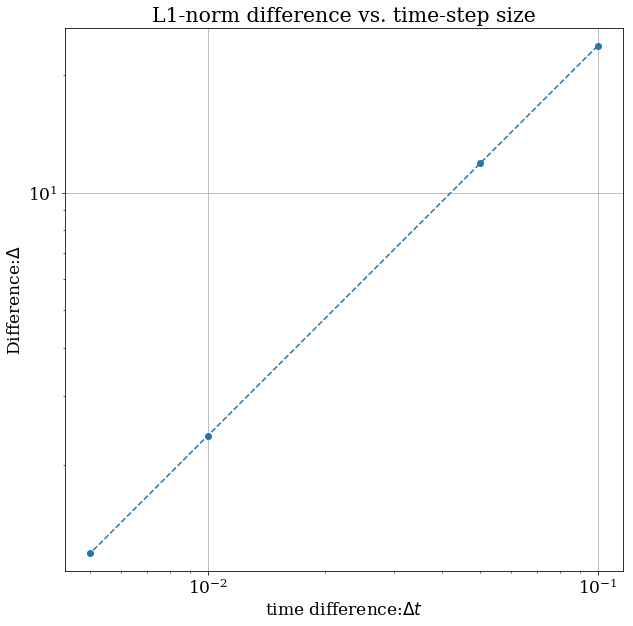

In [37]:
pyplot.figure(figsize=(10, 10))
pyplot.title('L1-norm difference vs. time-step size')  # set the title
pyplot.xlabel('time difference:$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference:$\Delta$')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');

In [ ]:
#Order of convergence
r=2
h=0.001
dt_values2=[h,r*h,r**2*h]
u_values=[]
for dt in dt_values2:
    N=int(T/dt)
    n=numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
           u_values2.append(u)
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])
f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('Observed order of convergence: p = {:.3f}'.format(p))